> Paper: https://www.mdpi.com/1424-8220/17/1/198

> Accelerometer: 

* Analog Devices (Norwood, Massachusetts, USA) ADXL345 accelerometer 
* configured for ±16g, 13 bits of analog to digital converter –ADC

> In order to convert the acceleration data (AD) given in bits into gravity, use this equation: 

* Acceleration [g]: [(2 * Range)/(2^Resolution)] * AD


> Dataset Download

https://github.com/suyash16999/Fall-Detection-System



In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/MyDrive/dataset/sisfall/SA01

In [ ]:
!cat /content/gdrive/MyDrive/dataset/sisfall/SA01/D01_SA01_R01.txt

In [ ]:
# import required module
import os
# assign directory
directory = '/content/gdrive/MyDrive/dataset/sisfall/'

In [ ]:
# 4m 20s
def loadData(path, activity, subject, trial):
  col_names = ["ax","ay","az","gx","gy","gz","acx","acy","acz"]
  data = pd.read_csv(path, names = col_names)
  data = data.replace(';', '', regex=True)

  # Sensitivity [LSB/g] = (2^Resolution) / (2*Range)
  range_g = 16  # range for ADXL345 when set to ±16g
  resolution_bits = 13  # resolution for ADXL345
  scale_factor = (2*range_g) / (2**resolution_bits)
  scale_factor
  scaled_x2 = data['ax'].apply(lambda x: x*scale_factor)
  scaled_y2 = data['ay'].apply(lambda x: x*scale_factor)
  scaled_z2 = data['az'].apply(lambda x: x*scale_factor)
  #return scaled_x, scaled_y, scaled_z, activity
  scaled_data = pd.DataFrame(
    {'s_ax': scaled_x,
     's_ay': scaled_y,
     's_az': scaled_z,
     'activity': activity,
     'subject': subject,
     'trial': trial
    })
  return scaled_data

In [ ]:
dataset = []
#df = pd.DataFrame(columns = ['s_ax', 's_ay', 's_az', 'activity', 'subject', 'trial'])
for root, dirs, files in os.walk(directory):
  for filename in files:
    if filename not in ['Readme.txt', 'desktop.ini', 'images.rar']:
      #print(root, filename)
      activity, subject, trial = filename.split('_')
      #print(activity, subject, trial.split('.')[0])
      path = os.path.join(root, filename)
      data = loadData(path, activity, subject, trial)
      print(len(data), activity, subject, trial.split('.')[0])
      #df = pd.concat([df, data], axis=0)
      dataset.append(data)
    print(len(dataset))
    #break

Streaming output truncated to the last 5000 lines.
19999 F11 SA15 R03
2018
19999 F15 SA15 R01
2019
19999 D11 SA15 R02
2020
19999 F04 SA15 R03
2021
19999 F07 SA15 R02
2022
19999 F09 SA15 R01
2023
19999 D12 SA15 R01
2024
19999 D11 SA15 R05
2025
19999 D07 SA15 R04
2026
19999 D05 SA15 R05
2027
19999 D13 SA15 R04
2028
19999 D08 SA15 R05
2029
19999 D09 SA15 R02
2030
19999 F11 SA15 R04
2031
19999 D17 SE15 R03
2032
19999 F06 SA15 R04
2033
19999 D19 SA15 R05
2034
19999 F12 SA15 R01
2035
19999 F11 SA15 R05
2036
19999 F12 SA15 R02
2037
19999 D05 SA15 R01
2038
19999 D16 SA15 R03
2039
19999 F06 SA15 R02
2040
19999 F03 SA15 R04
2041
19999 D07 SA15 R05
2042
19999 D11 SA15 R01
2043
19999 F09 SA15 R04
2044
19999 D18 SA15 R05
2045
19999 D07 SA15 R01
2046
19999 D12 SA15 R04
2047
19999 F15 SA15 R04
2048
19999 F06 SA15 R01
2049
19999 F10 SA15 R03
2050
19999 F01 SA15 R01
2051
19999 F05 SA15 R01
2052
19999 D14 SA15 R03
2053
19999 F10 SA15 R01
2054
19999 D10 SA15 R01
2055
19999 F12 SA15 R05
2056
19999 D18 SA1

In [ ]:
df = pd.concat(dataset, axis=0)
df.head()

,s_ax,s_ay,s_az,activity,subject,trial
0,0.53125,-5.59375,-3.09375,F11,SA08,R05.txt
1,0.46875,-5.43750,-2.81250,F11,SA08,R05.txt
2,0.03125,-5.50000,-2.53125,F11,SA08,R05.txt
3,-0.31250,-5.62500,-2.40625,F11,SA08,R05.txt
4,-0.65625,-5.96875,-1.96875,F11,SA08,R05.txt


In [ ]:
filename = '/content/gdrive/MyDrive/dataset/sisfall/all_dataset.csv'
df.to_csv(filename)

In [ ]:
print(len(df))

90095495


In [ ]:
df.describe().transpose()

In [ ]:
import pandas as pd
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

* ax is the acceleration data in the X axis measured by the sensor ADXL345.
* ay is the acceleration data in the Y axis measured by the sensor ADXL345.
* az is the acceleration data in the Z axis measured by the sensor ADXL345.

ADXL345:

* Resolution: 13 bits
* Range: +-16g
* 32 LSB/g (Least Significant Bit per g)

In [ ]:
path = 'https://raw.githubusercontent.com/suyash16999/Fall-Detection-System/main/SisFall_dataset/SA01/D01_SA01_R01.txt'

In [ ]:
col_names = ["ax","ay","az","gx","gy","gz","acx","acy","acz"]
data = pd.read_csv(path, names = col_names)
data = data.replace(';', '', regex=True)
data.head()

,ax,ay,az,gx,gy,gz,acx,acy,acz
0,17,-179,-99,-18,-504,-352,76,-697,-279
1,15,-174,-90,-53,-568,-306,48,-675,-254
2,1,-176,-81,-84,-613,-271,-2,-668,-221
3,-10,-180,-77,-104,-647,-227,-34,-697,-175
4,-21,-191,-63,-128,-675,-191,-74,-741,-133


In [ ]:
data['acz'] = data['acz'].astype('int64')

(array([  53.,  295., 1484., 3690., 7459., 3815., 1827.,  982.,  342.,
          52.]),
 array([-113. ,  -87.1,  -61.2,  -35.3,   -9.4,   16.5,   42.4,   68.3,
          94.2,  120.1,  146. ]),
 <BarContainer object of 10 artists>)

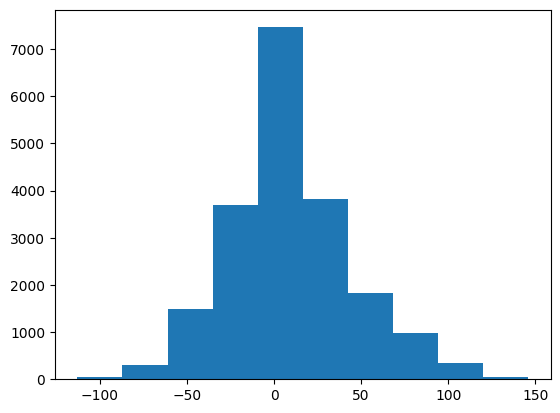

In [ ]:
plt.hist(data['ax'])

In [ ]:
# Sensitivity [LSB/g] = (2^Resolution) / (2*Range)
range_g = 16  # range for ADXL345 when set to ±16g
resolution_bits = 13  # resolution for ADXL345

scale_factor = (2*range_g) / (2**resolution_bits)
scale_factor

0.00390625

In [ ]:
1/32

0.03125

<Axes: >

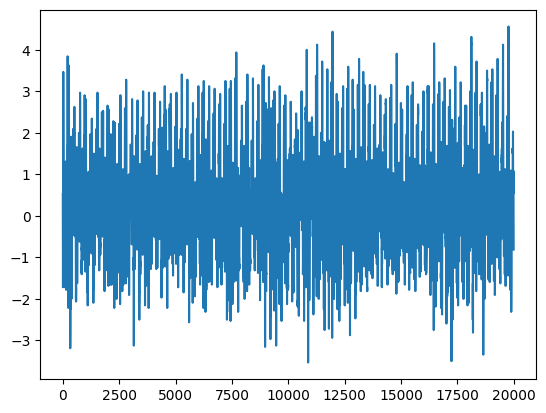

In [ ]:
# The raw_data from an accelerometer is typically a unitless quantity, 
# expressed in "counts" or "LSBs" (Least Significant Bits). 

# It's the digital representation of the acceleration data that's output 
# by the accelerometer's Analog to Digital Converter (ADC). 

sensitivity = 32  # sensitivity for LIS302DL in LSB/g when set to ±16g
scaled_x = data['ax'].apply(lambda x: x/sensitivity)
scaled_y = data['ay'].apply(lambda x: x/sensitivity)
scaled_z = data['az'].apply(lambda x: x/sensitivity)
scaled_x.plot()

In [ ]:
# raw_data is in "counts" or "LSBs" and is unitless.
# scaled_data is in g's, which is a unit of acceleration.
# scale_factor is in g/LSB, which converts raw data into units of acceleration.

scaled_data = pd.DataFrame(
    {'s_ax': scaled_x,
     's_ay': scaled_y,
     's_az': scaled_z
    })
scaled_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_ax,19999.0,0.289007,1.103472,-3.53125,-0.37500,0.21875,0.81250,4.5625
s_ay,19999.0,-8.177893,1.773710,-15.81250,-9.06250,-7.68750,-6.93750,-3.6875
s_az,19999.0,-0.835689,1.510310,-6.78125,-1.59375,-0.84375,0.15625,3.6875


In [ ]:
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,343416.0,1.007548,6.592155,-19.6100,-2.301839,0.23,4.020000,19.570000
y,343416.0,8.062965,6.624386,-19.6100,3.990000,8.66,12.530000,19.572440
z,343416.0,0.306067,4.455004,-19.6133,-2.179256,0.00,2.492524,19.231932


<Axes: >

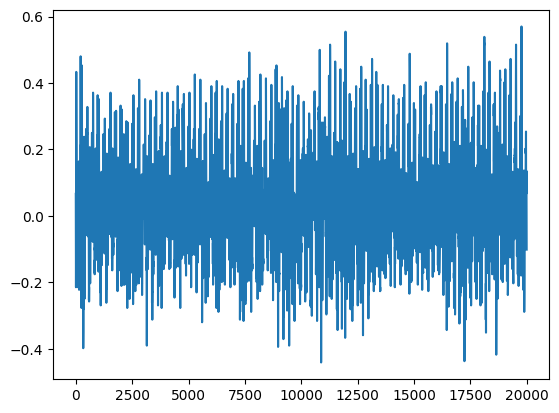

In [ ]:
scaled_x2 = data['ax'].apply(lambda x: x*scale_factor)
scaled_y2 = data['ay'].apply(lambda x: x*scale_factor)
scaled_z2 = data['az'].apply(lambda x: x*scale_factor)
scaled_x2.plot()

In [ ]:
scaled_data2 = pd.DataFrame(
    {'s_ax': scaled_x2,
     's_ay': scaled_y2,
     's_az': scaled_z2
    })
scaled_data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_ax,19999.0,0.036126,0.137934,-0.441406,-0.046875,0.027344,0.101562,0.570312
s_ay,19999.0,-1.022237,0.221714,-1.976562,-1.132812,-0.960938,-0.867188,-0.460938
s_az,19999.0,-0.104461,0.188789,-0.847656,-0.199219,-0.105469,0.019531,0.460938


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ax,19999.0,9.248212,35.311116,-113.0,-12.0,7.0,26.0,146.0
ay,19999.0,-261.692585,56.758706,-506.0,-290.0,-246.0,-222.0,-118.0
az,19999.0,-26.742037,48.329930,-217.0,-51.0,-27.0,5.0,118.0
gx,19999.0,-43.838642,271.090311,-1037.0,-193.0,-55.0,88.0,1171.0
gy,19999.0,-21.390870,429.168936,-1479.0,-348.0,-23.0,304.0,1158.0
gz,19999.0,-4.668683,423.139545,-1365.0,-314.0,14.0,314.0,1228.0
acx,19999.0,34.238862,134.122982,-432.0,-42.0,25.0,98.0,540.0
acy,19999.0,-1013.499875,217.103034,-1928.0,-1127.5,-955.0,-857.0,-456.0


<Axes: >

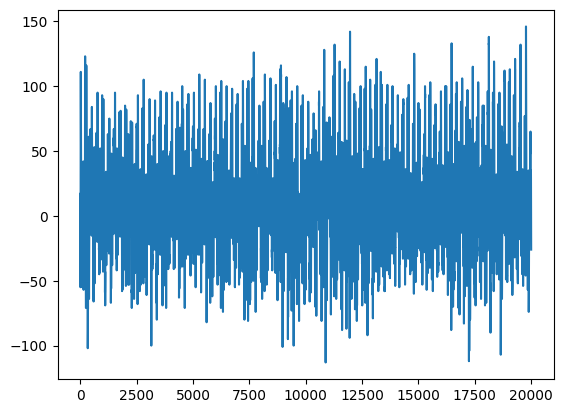

In [ ]:
data['ax'].plot()

In [ ]:
import plotly.graph_objects as go
from scipy import signal

In [ ]:
def fig_from_df(df):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig

fig = fig_from_df(data[['ax', 'ay', 'az']])
fig.write_html('time-history.html',full_html=False,include_plotlyjs='cdn')
fig.show()

<Axes: >

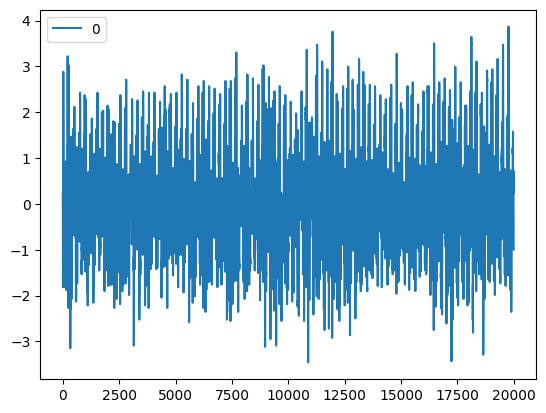

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data[['ax']]
#y = bal_df['label'].values
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
#print(type(X), type(y), type(scaled_X))
pd.DataFrame(scaled_X).plot()

In [ ]:
# noise fitering
# fitered_value * (1-sensitivity) + sensor_value * sensitivity
# 100개 센서 값을 더해서 평균값 계산 후 전달
# 버퍼를 만들어 센서 값을 채우고, 하나씩 갱신하면서 평균값 계산

def filter(Signal,t,i):
    fs = 200
    fc = 5.0  # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(4, w, 'low')
    print(b, a)
    print(sum(Signal))
    output = signal.filtfilt(b, a, Signal)
    print(sum(output))
    return output

In [ ]:
for i in ["ax","ay","az"]:
    data[i] = filter(data[i], _, i)
scaled_training_df = pd.DataFrame(data)

[3.12389769e-05 1.24955908e-04 1.87433862e-04 1.24955908e-04
 3.12389769e-05] [ 1.         -3.58973389  4.85127588 -2.92405266  0.66301048]
185106.8683249572
185192.65581273727
[3.12389769e-05 1.24955908e-04 1.87433862e-04 1.24955908e-04
 3.12389769e-05] [ 1.         -3.58973389  4.85127588 -2.92405266  0.66301048]
-5233897.475469636
-5233860.757248082
[3.12389769e-05 1.24955908e-04 1.87433862e-04 1.24955908e-04
 3.12389769e-05] [ 1.         -3.58973389  4.85127588 -2.92405266  0.66301048]
-534740.3212532436
-534745.3422340403


[3.12389769e-05 1.24955908e-04 1.87433862e-04 1.24955908e-04
 3.12389769e-05] [ 1.         -3.58973389  4.85127588 -2.92405266  0.66301048]
184955
185109.89887118945


(array([  48.,  221., 1381., 3377., 5808., 4221., 2164., 1865.,  788.,
         126.]),
 array([-79.59430408, -61.9914671 , -44.38863011, -26.78579313,
         -9.18295615,   8.41988083,  26.02271782,  43.6255548 ,
         61.22839178,  78.83122876,  96.43406575]),
 <BarContainer object of 10 artists>)

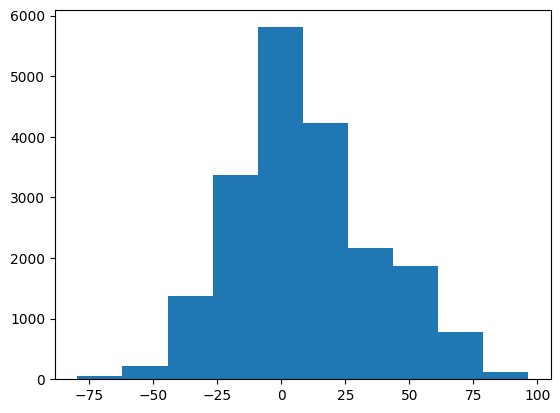

In [ ]:
plt.hist(filter(data['ax'], _, _))

In [ ]:
scaled_training_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ax,19999.0,9.260096,25.860491,-72.189417,-8.572000,6.026374,25.550550,87.623209
ay,19999.0,-261.706123,35.602752,-344.738225,-291.081036,-258.430844,-229.593944,-187.349373
az,19999.0,-26.738604,37.259256,-107.940899,-57.040269,-27.721127,7.836689,43.559809
gx,19999.0,-43.838642,271.090311,-1037.000000,-193.000000,-55.000000,88.000000,1171.000000
gy,19999.0,-21.390870,429.168936,-1479.000000,-348.000000,-23.000000,304.000000,1158.000000
gz,19999.0,-4.668683,423.139545,-1365.000000,-314.000000,14.000000,314.000000,1228.000000
acx,19999.0,34.238862,134.122982,-432.000000,-42.000000,25.000000,98.000000,540.000000
acy,19999.0,-1013.499875,217.103034,-1928.000000,-1127.500000,-955.000000,-857.000000,-456.000000


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ax,19999.0,9.260096,25.860491,-72.189417,-8.572000,6.026374,25.550550,87.623209
ay,19999.0,-261.706123,35.602752,-344.738225,-291.081036,-258.430844,-229.593944,-187.349373
az,19999.0,-26.738604,37.259256,-107.940899,-57.040269,-27.721127,7.836689,43.559809
gx,19999.0,-43.838642,271.090311,-1037.000000,-193.000000,-55.000000,88.000000,1171.000000
gy,19999.0,-21.390870,429.168936,-1479.000000,-348.000000,-23.000000,304.000000,1158.000000
gz,19999.0,-4.668683,423.139545,-1365.000000,-314.000000,14.000000,314.000000,1228.000000
acx,19999.0,34.238862,134.122982,-432.000000,-42.000000,25.000000,98.000000,540.000000
acy,19999.0,-1013.499875,217.103034,-1928.000000,-1127.500000,-955.000000,-857.000000,-456.000000


In [ ]:
# Converting data in bits to g
# For accelerometer ADXL345, Acceleration [g]: [(2*Range)/(2^Resolution)]*AD
# where AD = acceleration data, Range = 16g, Resolution = 2^13 = 8192
def conversion (Acc_x):
    x = []
    z = []
    print("Converting data in bits to g...")
    x = [(32.0 / 8192.0)*i for i in Acc_x]
    return x

Converting data in bits to g...


(array([  53.,  295., 1484., 3690., 7459., 3815., 1827.,  982.,  342.,
          52.]),
 array([-0.44140625, -0.34023437, -0.2390625 , -0.13789063, -0.03671875,
         0.06445312,  0.165625  ,  0.26679687,  0.36796875,  0.46914062,
         0.5703125 ]),
 <BarContainer object of 10 artists>)

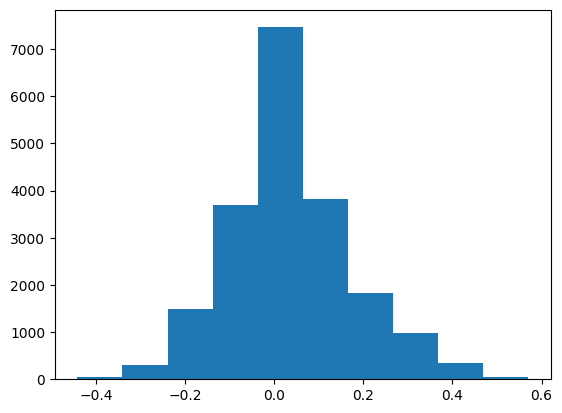

In [ ]:
plt.hist(conversion(data['ax']))

In [ ]:
data['ax'].iloc[:200]

0      17
1      15
2       1
3     -10
4     -21
       ..
195    -3
196    -4
197   -16
198   -20
199   -23
Name: ax, Length: 200, dtype: int64

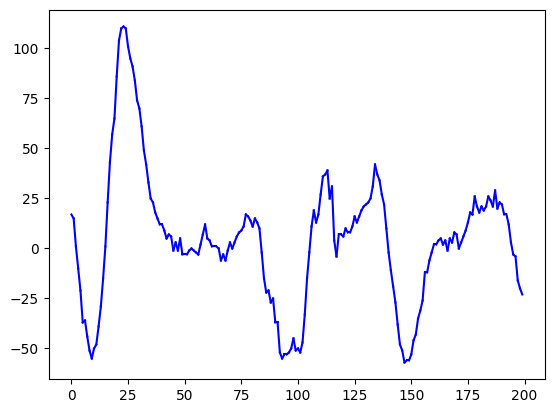

In [ ]:
for idx, i in enumerate(range(len(data['ax'].iloc[:200])-1)):
    #print(idx, idx+1)
    #print(data['ax'].iloc[i], data['ax'].iloc[i+1])   
    plt.plot([idx, idx+1],[data['ax'].iloc[i], data['ax'].iloc[i+1]], color='b')

In [ ]:
def plot_axis(ax, user, x, y, title):
  for i in range(len(x)-1):
    ax.plot([x.iloc[i], x.iloc[i+1]],[y.iloc[i], y.iloc[i+1]])
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['user'], data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['user'], data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['user'], data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, user, x, y, title):
  for i in range(len(x)-1):
    ax.plot([x.iloc[i], x.iloc[i+1]],[y.iloc[i], y.iloc[i+1]], color=u2c[user.iloc[i]])
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

for activity in data['activity'].value_counts().index:
    mask = (data['activity'] == activity)
    data_for_plot = data[mask][:200]
    plot_activity(activity, data_for_plot)

In [ ]:
data['ax'].value_counts().index

Int64Index([ -16,    8,    7,   10,    9,   11,   -3,    5,    1,    6,
            ...
            -108,  -84, -106,  127,  142,  137,  129, -105, -111,  146],
           dtype='int64', length=251)

In [ ]:
data['acz'].unique()

array(['-279', '-254', '-221', ..., ' 467', '-610', '-511'], dtype=object)

In [ ]:
data['acz'] = data['acz'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax      19999 non-null  float64
 1   ay      19999 non-null  float64
 2   az      19999 non-null  float64
 3   gx      19999 non-null  int64  
 4   gy      19999 non-null  int64  
 5   gz      19999 non-null  int64  
 6   acx     19999 non-null  int64  
 7   acy     19999 non-null  int64  
 8   acz     19999 non-null  int64  
 9   fx      19999 non-null  float64
 10  fy      19999 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.7 MB


In [ ]:
from scipy.signal import butter, lfilter, freqz

# Filter requirements.
order = 4
fs = 200.0  # sample rate, Hz
cutoff = 5.0  # desired cutoff frequency of the filter, Hz


# From??????
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
data['fx'] = pd.Series(butter_lowpass_filter(data["acx"], cutoff, fs, order))		
data['fy'] = pd.Series(butter_lowpass_filter(data["acy"], cutoff, fs, order))
data['fz'] = pd.Series(butter_lowpass_filter(data["acz"], cutoff, fs, order))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax      19999 non-null  float64
 1   ay      19999 non-null  float64
 2   az      19999 non-null  float64
 3   gx      19999 non-null  int64  
 4   gy      19999 non-null  int64  
 5   gz      19999 non-null  int64  
 6   acx     19999 non-null  int64  
 7   acy     19999 non-null  int64  
 8   acz     19999 non-null  int64  
 9   fx      19999 non-null  float64
 10  fy      19999 non-null  float64
 11  fz      19999 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1.8 MB


In [ ]:
data.head()

,ax,ay,az,gx,gy,gz,acx,acy,acz,fx,fy,fz
0,11.391241,-183.054790,-100.753465,-18,-504,-352,76,-697,-279,0.002374,-0.021774,-0.008716
1,8.121127,-195.516695,-94.192928,-53,-568,-306,48,-675,-254,0.019519,-0.186342,-0.074084
2,5.232188,-207.636109,-87.688152,-84,-613,-271,-2,-668,-221,0.078730,-0.799142,-0.314598
3,2.802202,-219.289796,-81.299952,-104,-647,-227,-34,-697,-175,0.212052,-2.347236,-0.910956
4,0.900137,-230.360956,-75.085817,-128,-675,-191,-74,-741,-133,0.436206,-5.421097,-2.062638


In [ ]:


data = data.drop('acx', axis=1)
data = data.drop('acy', axis=1)
data = data.drop('acz', axis=1)
data.insert(loc = 0, column = 'time', value=data.index)

ax = data['ax'] * data['ax']
ay = data['ay'] * data['ay']
az = data['az'] * data['az']
am = ax + ay + az
am = am.apply(lambda x: math.sqrt(x))
data['accmagnitude'] = am
gx = data['gx'] * data['gx']
gy = data['gy'] * data['gy']
gz = data['gz'] * data['gz']
gm = gx + gy + gz
gm = gm.apply(lambda x: math.sqrt(x))
data['gccmagnitude'] = gm

In [ ]:
import urllib
url = 'https://raw.githubusercontent.com/laxmimerit/Human-Activity-Recognition-Using-Accelerometer-Data-and-CNN/master/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt'

processedList = []
for i, line in enumerate(urllib.request.urlopen(url)):
    try:
        line = line.decode('utf-8')
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        #print('last', last)
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)
        print('line', line)

Error at line number:  281873
line ['\n']
Error at line number:  281874
line ['\n']
Error at line number:  281875
line ['\n']


In [ ]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data2 = pd.DataFrame(data = processedList, columns = columns)
data2.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
data2['x'] = data2['x'].astype('float')
data2['y'] = data2['y'].astype('float')
data2['z'] = data2['z'].astype('float')

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ax,19999.0,9.255958,27.746646,-79.594304,-9.309476,5.763147,25.600464,96.434066
ay,19999.0,-261.707265,36.449273,-354.825040,-286.662246,-259.917658,-229.028248,-183.054790
az,19999.0,-26.738596,37.884141,-113.747331,-55.688649,-27.860593,9.265931,45.701787
gx,19999.0,-43.838642,271.090311,-1037.000000,-193.000000,-55.000000,88.000000,1171.000000
gy,19999.0,-21.390870,429.168936,-1479.000000,-348.000000,-23.000000,304.000000,1158.000000
gz,19999.0,-4.668683,423.139545,-1365.000000,-314.000000,14.000000,314.000000,1228.000000
acx,19999.0,34.238862,134.122982,-432.000000,-42.000000,25.000000,98.000000,540.000000
acy,19999.0,-1013.499875,217.103034,-1928.000000,-1127.500000,-955.000000,-857.000000,-456.000000
acz,19999.0,14.289014,192.109553,-759.000000,-83.000000,19.000000,140.000000,586.000000
fx,19999.0,34.208468,110.592959,-309.895957,-38.603040,22.048556,96.734560,392.161208
